In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Carica il file CSV
data = pd.read_csv('cardio_train.csv', sep=';')

# Visualizza le prime righe
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [20]:
# Dimensioni del dataset
print("Shape of the dataset:", data.shape)

# Informazioni generali sulle colonne
data.info()

# Statistiche descrittive
data.describe()

Shape of the dataset: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Controllo dei valori nulli
print("Missing values:\n", data.isnull().sum())

Missing values:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


cardio
0    35021
1    34979
Name: count, dtype: int64


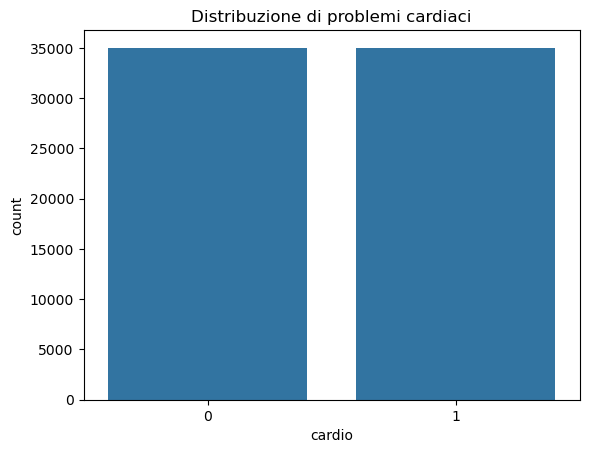

In [22]:
# Conta i valori della variabile target
print(data['cardio'].value_counts())

# Grafico a barre della distribuzione
sns.countplot(data=data, x='cardio')
plt.title("Distribuzione di problemi cardiaci")
plt.show()


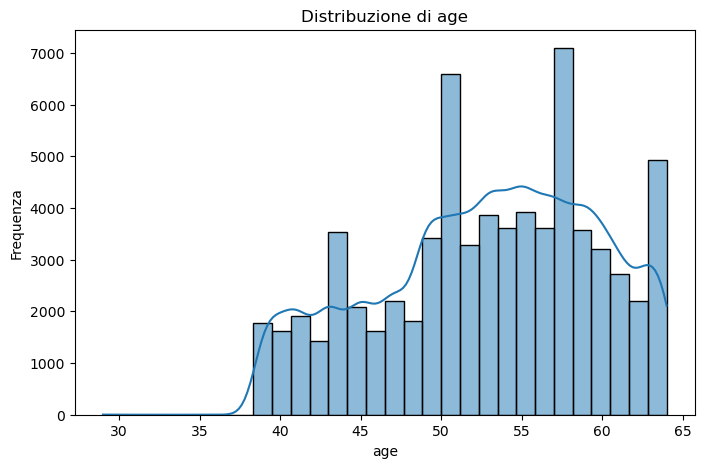

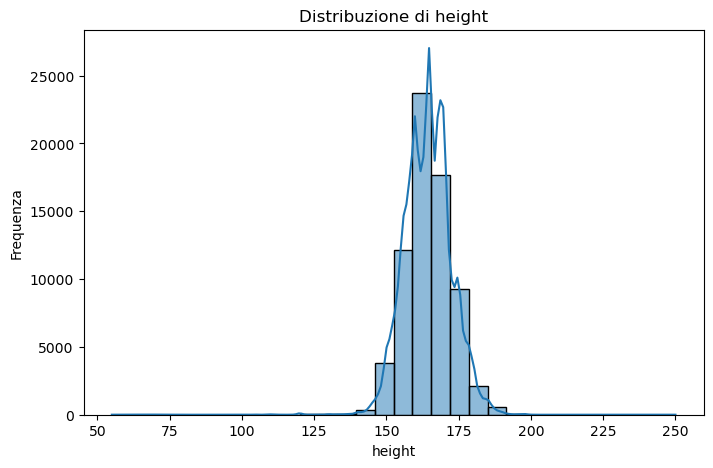

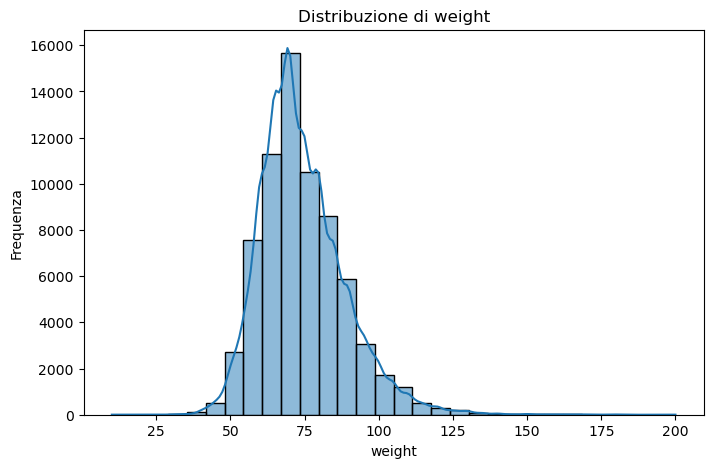

In [23]:
# Lista corretta delle colonne numeriche
numerical_columns = ['age', 'height', 'weight']

# Trasformo l'età in anni
data['age'] = (data['age'] / 365).astype(int)

# Genero gli istogrammi per ogni colonna numerica
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()


La distribuzione dell'età mostra una concentrazione maggiore di individui tra i 50 e i 60 anni, con un picco significativo intorno ai 55 anni. In caso di età non presente nel dataset (ad esempio, età molto giovane o molto avanzata), l'algoritmo potrebbe non generalizzare bene, poiché manca di dati rappresentativi per queste fasce.

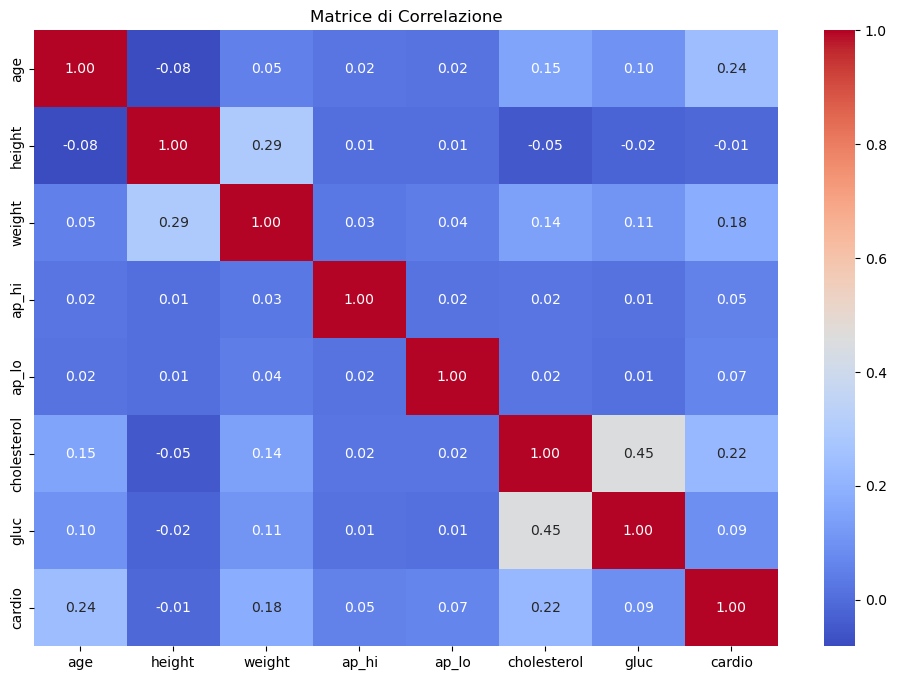

In [26]:
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

# Matrice di correlazione
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_columns + ['cardio']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione')
plt.show()

Rilevazione di outlier

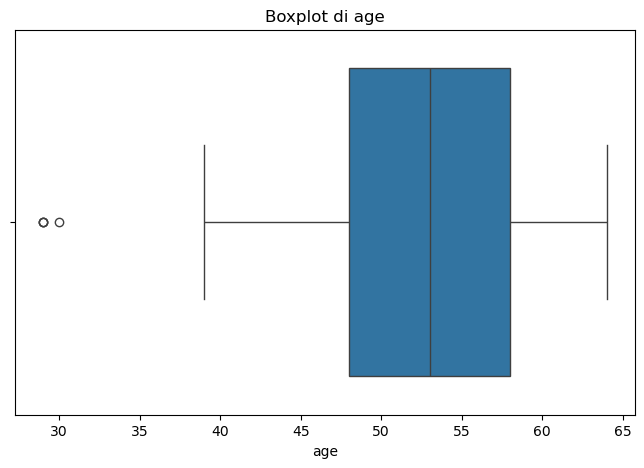

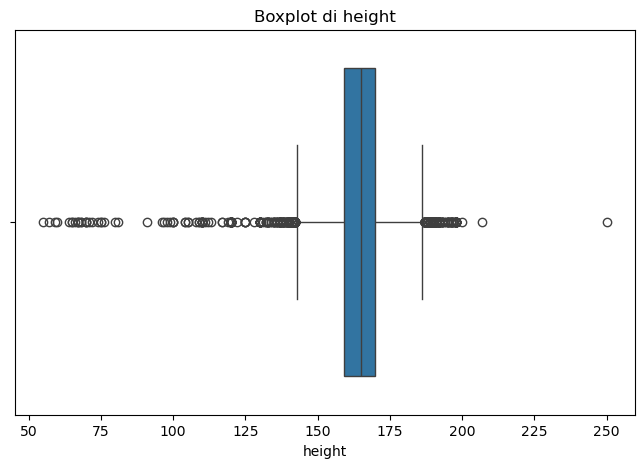

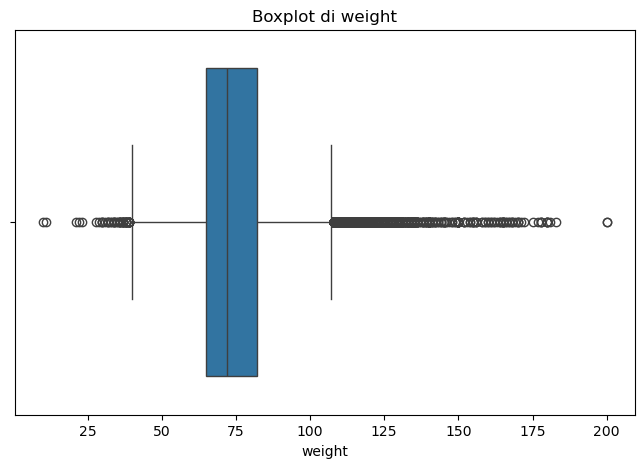

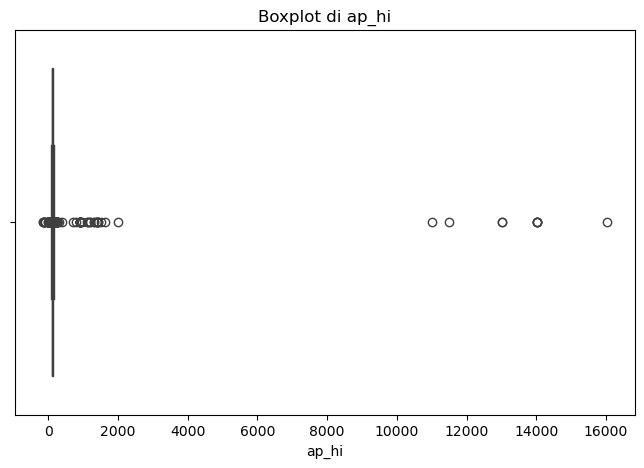

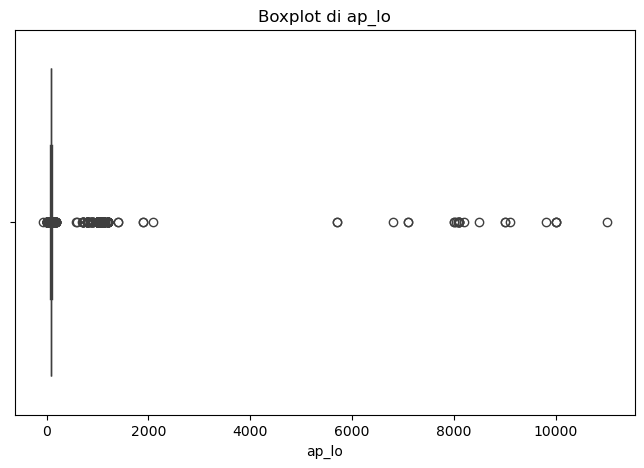

In [27]:
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot di {col}')
    plt.show()


Analisi variabili categoriche

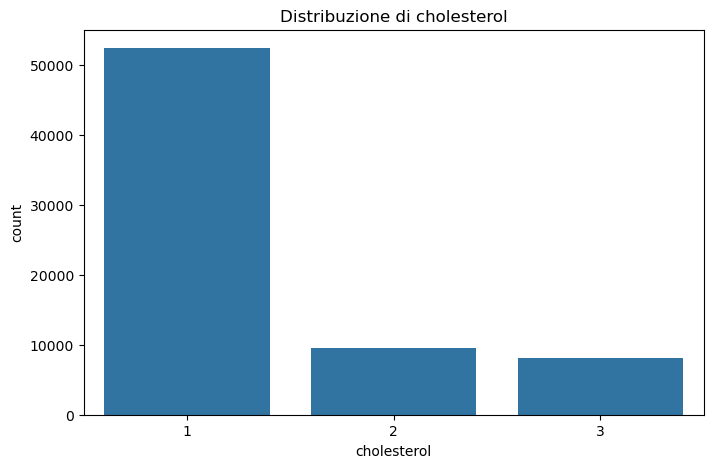

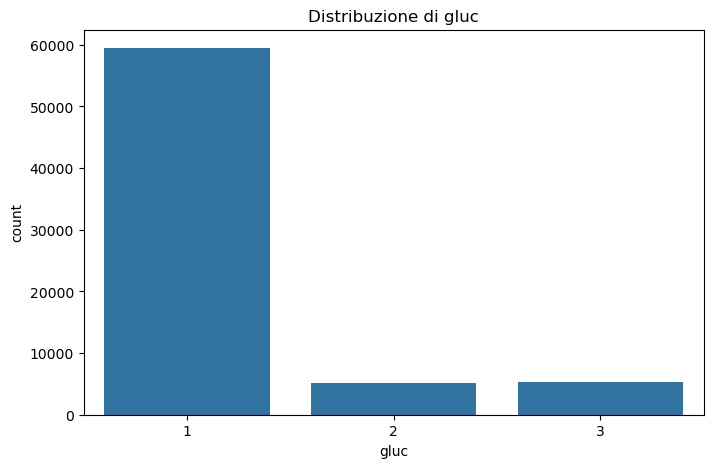

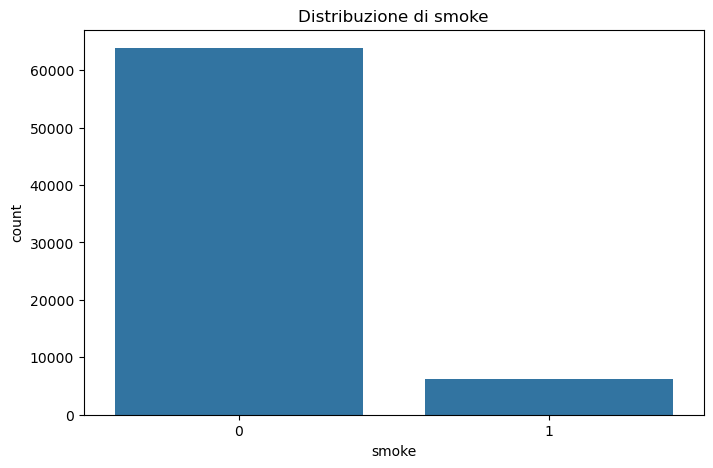

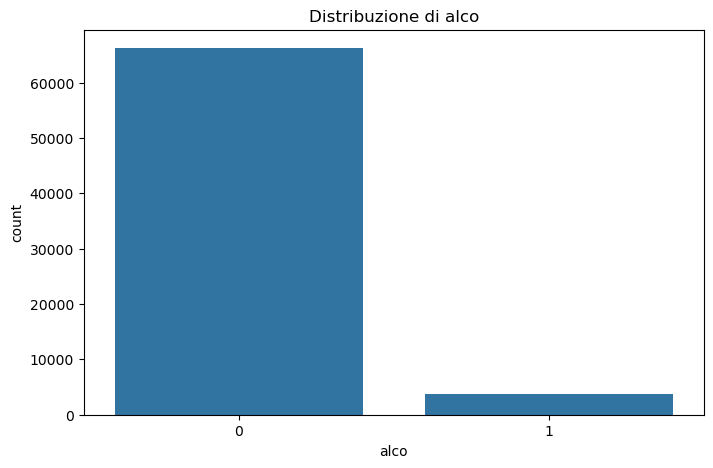

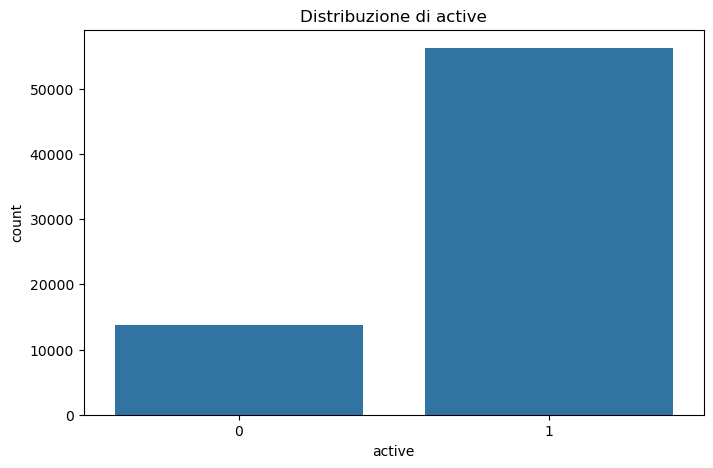

In [28]:
categorical_columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=data[col])
    plt.title(f'Distribuzione di {col}')
    plt.show()
